In [35]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
path = r'/Users/polinarozhkova/Desktop/GitHub/cr_eda_chicago/'
final_merge_df = pd.read_csv(os.path.join(path, 'clean_data/merge_all.csv'))
cr_reports = pd.read_excel(os.path.join(path, 'inputs/CR_from_CPD_Annual_Reports_copy.xlsx'))

### Plot 1

In [37]:
yr_month_map = pd.DataFrame(final_merge_df.groupby(['year', 'month'])
                            ['case_number'].count()).reset_index()
yr_month_map = yr_month_map.rename(
    columns={'case_number': 'homicides'}).pivot('year', 'month', 'homicides')

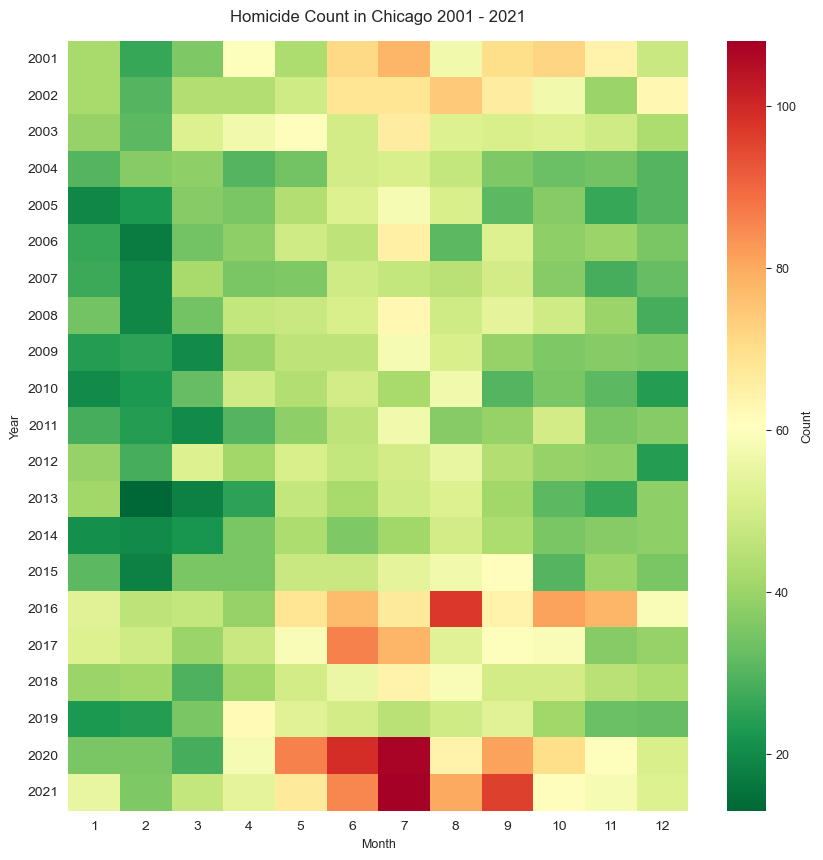

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(yr_month_map, cmap='RdYlGn_r',
            cbar_kws={'label': 'Count'})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
plt.title('Homicide Count in Chicago 2001 - 2021', fontdict={'fontsize': 12}, pad=14)
plt.savefig(os.path.join(path, 'plots/static_plot_1.png'))

In [39]:
all_cleared_df = final_merge_df[final_merge_df['cleared'] == 'Y']
all_cleared_df

,case_number,unique_id,date_x,block_x,primary_type,iucr,age,sex,race,month,...,homicide_victim_last_name,year,id,date,injury_type,cleared,date_clear,beat,district,year_cleared
0,G011117,HOM-G011117-#1,2001-01-06 03:30:00,8700 S BURLEY AVE,HOMICIDE,110,20-29,M,BLK,1,...,CAMPBELL,2001,644.0,2001-01-06 00:00:00,SHOT,Y,2001-02-27,424.0,4.0,2001.0
2,G032407,HOM-G032407-#1,2001-01-16 01:17:00,600 N CICERO AVE,HOMICIDE,110,20-29,M,BLK,1,...,BYRD,2001,659.0,2001-01-16 00:00:00,SHOT,Y,2001-05-28,1111.0,11.0,2001.0
3,G040822,HOM-G040822-#1,2001-01-20 01:09:00,1000 N CICERO AVE,HOMICIDE,110,0-19,M,BLK,1,...,PITTS,2001,663.0,2001-01-20 00:00:00,SHOT,Y,2001-01-24,1111.0,11.0,2001.0
4,G042611,HOM-G042611-#1,2001-01-20 23:26:00,700 N DRAKE AVE,HOMICIDE,110,30-39,M,WWH,1,...,DIAZ,2001,664.0,2001-01-20 00:00:00,SHOT,Y,2001-07-05,1121.0,11.0,2001.0
5,G042730,HOM-G042730-#1,2001-01-21 01:15:00,7800 S CONSTANCE AVE,HOMICIDE,110,20-29,M,BLK,1,...,COLE,2001,666.0,2001-01-21 00:00:00,SHOT,Y,2001-02-26,414.0,4.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,JB493178,HOM-JB493178-#2,2018-10-28 02:15:00,6200 S MAPLEWOOD AVE,HOMICIDE,110,0-19,M,WWH,10,...,PENA,2018,24258.0,2018-10-28 02:15:00,SHOT,Y,2019-12-24,825.0,8.0,2019.0
11484,HX293341,HOM-HX293341-#2,2014-06-07 03:10:00,4600 S ELLIS AVE,HOMICIDE,110,20-29,F,BLK,6,...,PERSON,2014,24273.0,2014-06-07 03:10:00,SHOT,Y,2021-06-17,222.0,2.0,2021.0
11488,HW334016,HOM-HW334016-#5,2013-06-25 02:32:00,7300 S DR MARTIN LUTHER KING JR DR,HOMICIDE,110,0-19,F,BLK,6,...,BOYD,2013,20943.0,2013-06-25 02:32:00,SHOT,Y,2020-11-05,323.0,3.0,2020.0
11489,HT239403,HOM-HT239403-#5,2011-04-07 23:09:00,1100 N KEYSTONE AVE,HOMICIDE,110,50-59,M,BLK,4,...,ROCKSHELL,2011,19827.0,2011-04-07 00:00:00,SHOT,Y,2015-02-23,1111.0,11.0,2015.0


In [44]:
all_cleared_df['date'] = all_cleared_df['date'].astype('datetime64[D]')
all_cleared_df['date_clear'] = all_cleared_df['date_clear'].astype('datetime64[D]')

/var/folders/bm/md2wz8y14g11t9xt7dbyty7c0000gn/T/ipykernel_82812/3101170822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleared_df['date'] = all_cleared_df['date'].astype('datetime64[D]')
/var/folders/bm/md2wz8y14g11t9xt7dbyty7c0000gn/T/ipykernel_82812/3101170822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleared_df['date_clear'] = all_cleared_df['date_clear'].astype('datetime64[D]')


In [45]:
all_cleared_df['time_to_clear'] = (all_cleared_df.date_clear - all_cleared_df.date).dt.days

/var/folders/bm/md2wz8y14g11t9xt7dbyty7c0000gn/T/ipykernel_82812/1567168392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleared_df['time_to_clear'] = (all_cleared_df.date_clear - all_cleared_df.date).dt.days


In [48]:
all_cleared_df['time_to_clear'].describe()

count    5410.000000
mean      414.097227
std       928.275329
min       -17.000000
25%         5.000000
50%        56.000000
75%       311.000000
max      7477.000000
Name: time_to_clear, dtype: float64

In [51]:
all_cleared_df['time_to_clear'].sort_values()

9095      -17
5131        0
8911        0
10334       0
4787        0
         ... 
481      7056
171      7096
9932     7103
663      7359
7276     7477
Name: time_to_clear, Length: 5410, dtype: int64

In [26]:
cleared_fem = all_cleared_df[all_cleared_df['sex'] == 'F']
cleared_fem

,case_number,unique_id,date_x,block_x,primary_type,iucr,age,sex,race,month,...,homicide_victim_last_name,year,id,date,injury_type,cleared,date_clear,beat,district,year_cleared
10,G069278,HOM-G069278-#1,2001-02-03 00:53:00,1500 W WARREN BV,HOMICIDE,110,30-39,F,BLK,2,...,OLLISON,2001,678.0,2001-02-03 00:00:00,STRANGULATION,Y,2001-05-03,1333.0,13.0,2001.0
11,G072969,HOM-G072969-#1,2001-02-05 00:30:00,10200 S STATE ST,HOMICIDE,110,70-79,F,BLK,2,...,COCHRAN,2001,686.0,2001-02-05 00:00:00,OTHER,Y,2001-02-15,511.0,5.0,2001.0
36,G491442,HOM-G491442-#1,2001-08-18 02:16:00,2200 S STATE ST,HOMICIDE,110,20-29,F,BLK,8,...,MORRIS,2001,1015.0,2001-08-18 00:00:00,SHOT,Y,2001-08-20,134.0,1.0,2001.0
38,G493069,HOM-G493069-#1,2001-08-18 21:15:00,300 E KENSINGTON AVE,HOMICIDE,110,30-39,F,BLK,8,...,BLUNT,2001,1017.0,2001-08-18 00:00:00,STRANGULATION,Y,2001-08-27,532.0,5.0,2001.0
47,G508892,HOM-G508892-#1,2001-08-26 01:54:00,8000 S HOUSTON AVE,HOMICIDE,110,30-39,F,BLK,8,...,SMITH,2001,1029.0,2001-08-26 00:00:00,SHOT,Y,2001-08-30,422.0,4.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10892,HZ493319,HOM-HZ493319-#1,2016-10-28 22:20:00,1900 W GARFIELD BLVD,HOMICIDE,110,30-39,F,BLK,10,...,FORD,2016,22882.0,2016-10-28 00:00:00,SHOT,Y,2017-01-04,932.0,9.0,2017.0
10951,JD397606,HOM-JD397606-#2,2020-10-13 00:05:00,2100 E 95TH PL,HOMICIDE,110,30-39,F,BLK,10,...,JONES,2020,25558.0,2020-10-13 00:05:00,OTHER,Y,2020-10-22,431.0,4.0,2020.0
10958,JD164620,HOM-JD164620-#5,2020-02-25 17:18:00,7900 S AVALON AVE,HOMICIDE,110,0-19,F,BLK,2,...,BEEMON,2020,24969.0,2020-02-25 17:18:00,SHOT,Y,2020-12-16,411.0,4.0,2020.0
10967,HX293341,HOM-HX293341-#2,2014-06-07 03:10:00,4600 S ELLIS AVE,HOMICIDE,110,20-29,F,BLK,6,...,PERSON,2014,24273.0,2014-06-07 03:10:00,SHOT,Y,2021-06-17,222.0,2.0,2021.0


### Plot 2

In [6]:
# all homicides and clearances
total_hom_yr = pd.DataFrame(final_merge_df.groupby(['year'])['case_number'].count()).reset_index()
clr_yr = pd.DataFrame(all_cleared_df.groupby(['year'])['case_number'].count()).reset_index()
total_commit_cleared = pd.merge(clr_yr, total_hom_yr, on=['year']).rename(
    columns={'case_number_y': 'hom_total', 'case_number_x': 'clear_total'})

In [7]:
# firearm homicides and firearm clearances
firearm = pd.DataFrame(final_merge_df.groupby(['year'])['gunshot_injury_i'].
                       apply(lambda x: (x == 'YES').sum())).reset_index()
firearm_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['gunshot_injury_i'].
                           apply(lambda x: (x == 'YES').sum())).reset_index()
total_firearm = pd.merge(firearm, firearm_clr, on=['year']).rename(
    columns={'gunshot_injury_i_x': 'firearm_total', 'gunshot_injury_i_y': 'firearm_clear'})

In [8]:
dv = pd.DataFrame(final_merge_df.groupby(['year'])['domestic'].
                  apply(lambda x: (x == True).sum())).reset_index()
dv_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['domestic'].
                      apply(lambda x: (x == True).sum())).reset_index()
total_dv = pd.merge(dv, dv_clr, on=['year']).rename(
    columns={'domestic_x': 'dv_total', 'domestic_y': 'dv_clear'})

In [9]:
total_commit_cleared = pd.melt(total_commit_cleared, id_vars=['year'],
                               value_vars=['hom_total', 'clear_total'],
                               var_name='case_status', value_name='Count')

In [10]:
total_firearm = pd.melt(total_firearm, id_vars=['year'],
                        value_vars=['firearm_total', 'firearm_clear'],
                        var_name='case_status', value_name='Count')

In [11]:
total_dv = pd.melt(total_dv, id_vars=['year'], value_vars=['dv_total', 'dv_clear'],
                   var_name='case_status', value_name='Count')

In [12]:
def line_subplots(df, ax_n):
    plt.rcParams.update({'font.size': 9})
    sns.set_style("darkgrid")
    sns.lineplot(data=df, x='year', y='Count',
                 hue='case_status', ax=ax_n, linewidth=0.75, palette=['#34495e', '#3498db'])
    ax_n.legend(loc='best')
    ax_n.set_xlabel('Year')
    ax_n.set_ylabel('Count')
    ax_n.set_xticks(range(2001, 2022))
    return

In [13]:
def plot_annotate(ax_n, y1, y2, y3):
    style = dict(size=10, color='red', alpha=0.75)
    ax_n.axvline(2001, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2008, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2020, linestyle='dashed', color='red', alpha=0.25)
    ax_n.text(2001, y1, '  9/11 Attack', ha='left',  **style)
    ax_n.text(2008, y2, 'Financial Crisis Starts  ', ha='right',  **style)
    ax_n.text(2020, y3, 'Covid-19 Lockdown  ', ha='right',  **style)
    return

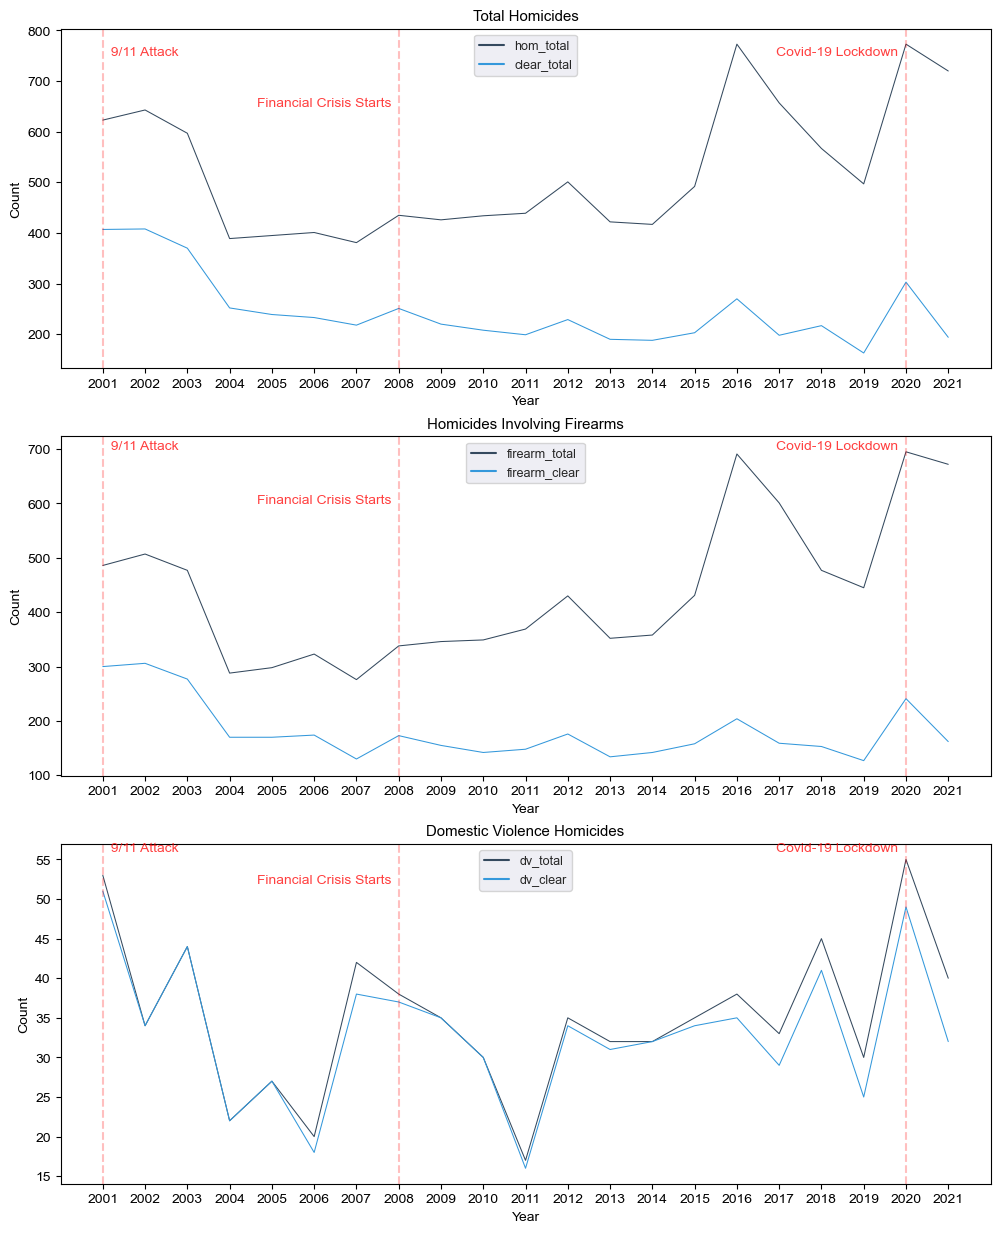

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
ax1, ax2, ax3 = axes.flatten()
line_subplots(total_commit_cleared, ax1)
line_subplots(total_firearm, ax2)
line_subplots(total_dv, ax3)
plot_annotate(ax1, 750, 650, 750)
plot_annotate(ax2, 700, 600, 700)
plot_annotate(ax3, 56, 52, 56)
ax1.set_title('Total Homicides')
ax2.set_title('Homicides Involving Firearms')
ax3.set_title('Domestic Violence Homicides')
plt.savefig(os.path.join(path, 'plots/static_plot_2.png'))

Sources:
For heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html;
https://regenerativetoday.com/time-series-data-visualization-in-python/,
For annotations:
https://jessica-miles.medium.com/adding-annotations-to-visualizations-using-matplotlib-279e9c770baa
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html